# HEALTH INSURANCE LEAD PREDICTION

### Data Dictionary:
- **ID** : Unique Identifier for a row
- **City_Code**: Code for the City of the customers
- **Region_Code** : Code for the Region of the customers
- **Accomodation_Type** : Customer Owns or Rents the house
- **Reco_Insurance_Type** : Joint or Individual type for the recommended insurance  
- **Upper_Age** : Maximum age of the customer 
- **Lower _Age** : Minimum age of the customer
- **Is_Spouse** : If the customers are married to each other (in case of joint insurance) 
- **Health_Indicator** : Encoded values for health of the customer
- **Holding_Policy_Duration** : Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)
- **Holding_Policy_Type** : Type of holding policy
- **Reco_Policy_Cat** : Encoded value for recommended health insurance
- **Reco_Policy_Premium** : Annual Premium (INR) for the recommended health insurance
- **Response (Target)** : **0** = Customer did not show interest in the recommended policy, **1** = Customer showed interest in the recommended policy

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import dirname, abspath
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the train file
root_dir = abspath('.')
root_dir

'C:\\Users\\EMKAY\\Desktop\\Greyatom\\AnalyticsVidhya\\JOB-A-THON'

In [3]:
train_data = os.path.join(root_dir, 'train_Df64byy.csv')
test_data = os.path.join(root_dir, 'test_YCcRUnU.csv')

In [4]:
train = pd.read_csv(train_data)
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


### BASIC STUDY OF TRAIN DATA

In [5]:
#Numerical features
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [6]:
train.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

##### It is an imbalanced dataset

In [7]:
#Categorical features
train.describe(include = np.object)

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
ID                         50882 non-null int64
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           39191 non-null object
Holding_Policy_Duration    30631 non-null object
Holding_Policy_Type        30631 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 5.4+ MB


In [9]:
train.Region_Code.nunique()

5316

In [10]:
train.City_Code.nunique()

36

###### Observations:

- 'Health indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type' are the columns with null values which will be handled below

- Region_code and city_code can have a relationship (check their correlation with Response)

- Region_code has to made an object and treated as a categorical feature

- Check the correlation between upper_age and lower_age

- Drop the ID column as it is unique to every user and will not contribute to the model in any way

- Health_Indicator has null values. After accounting for those, the column can be one-hot encoded

- Holding_Policy_Duration is object but should be integar since it is #years. It has missing values. After accounting for those missing values, it can be converted to integars 

- Holding_Policy_Duration and Holding_Policy_Type seem to have blank values for the same rows - They could be customers filling the form and enquiring for the first time - which would make us replace the empty values with 0.

- Health_Indicator has null values for around 11000 customers. Will have to deal with them

In [11]:
#Drop the ID column
train.drop('ID', axis = 1, inplace = True)

### EDA - UNIVARAITE ANALYSIS

##### Which region has the maximum number of customers

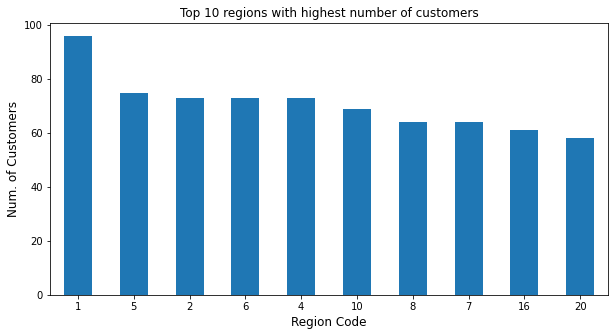

In [12]:
#Region distribution - Top 10
train.Region_Code.value_counts()[:10].plot(kind = 'bar', figsize = (10,5))
plt.title('Top 10 regions with highest number of customers')
plt.xlabel('Region Code', fontsize = 12)
plt.ylabel('Num. of Customers', fontsize = 12)
plt.xticks(rotation=0)
plt.show()

* Region with code 1 has the highest number of customers

#### Comparison between upper age distribution and lower age distribution

- Upper age is the age of the elderly person among the 2 applicants(if joint acc)
- Lower age is the age of the younger among the 2
- The upper age and lower age values are same in case of individual accounts

In [13]:
train.Upper_Age.value_counts()[:15]

75    2982
23    1671
24    1652
25    1644
22    1563
26    1461
27    1246
28    1198
21    1128
29     994
30     975
32     911
31     896
52     881
55     878
Name: Upper_Age, dtype: int64

In [14]:
train.Lower_Age.value_counts()[:15]

75    2213
23    1840
25    1783
24    1775
22    1727
26    1571
27    1343
21    1341
28    1310
29    1080
30    1031
20     985
32     958
31     948
33     896
Name: Lower_Age, dtype: int64

#### Response - Target column

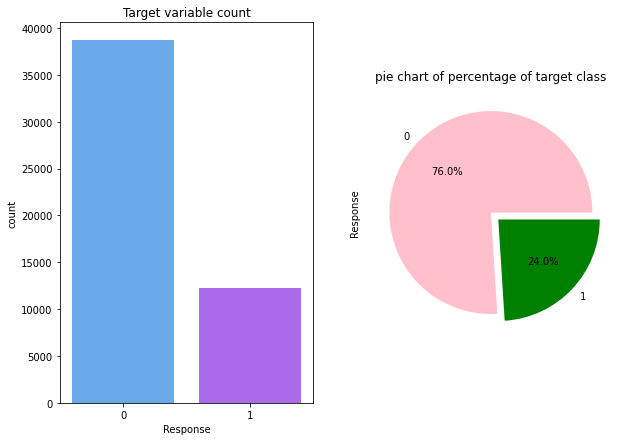

In [15]:
plt.subplot(1,2,1)
sns.countplot(train['Response'],palette = 'cool')
plt.title("Target variable count")



plt.subplot(1,2,2)
count = train['Response'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',
               colors=['pink', 'green'], figsize= (10,7), explode= [0,0.1], 
               title = "pie chart of percentage of target class")
plt.show()

#### It is an imbalanced dataset

### Health Indicator

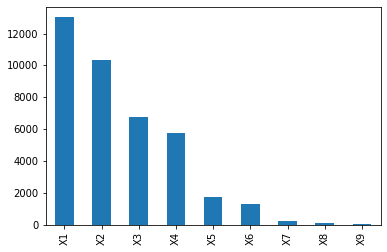

In [16]:
train['Health Indicator'].value_counts().plot(kind = 'bar')
plt.show()

- It is in the decreasing order of counts. Only 63 customers are as healthy as X9
- We have null values to deal with

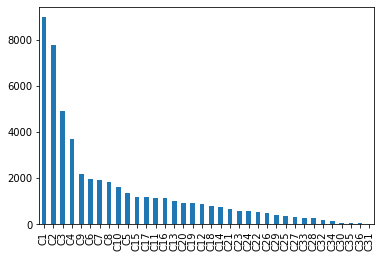

In [17]:
#City_Code distribution
train.City_Code.value_counts().plot(kind = 'bar')
plt.show()

- There is a stark difference in the distribution of customers city wise.
- Maximum number of customers from C1
- There are only 15 rows for C31

#### Reco_Policy_Cat

In [18]:
train.Reco_Policy_Cat.value_counts()

22    6602
18    5553
21    5027
16    4084
17    3756
19    3708
20    3177
12    2168
1     1967
2     1917
14    1742
13    1684
15    1615
3     1059
4     1015
5     1007
6      851
7      834
9      789
11     781
8      776
10     770
Name: Reco_Policy_Cat, dtype: int64

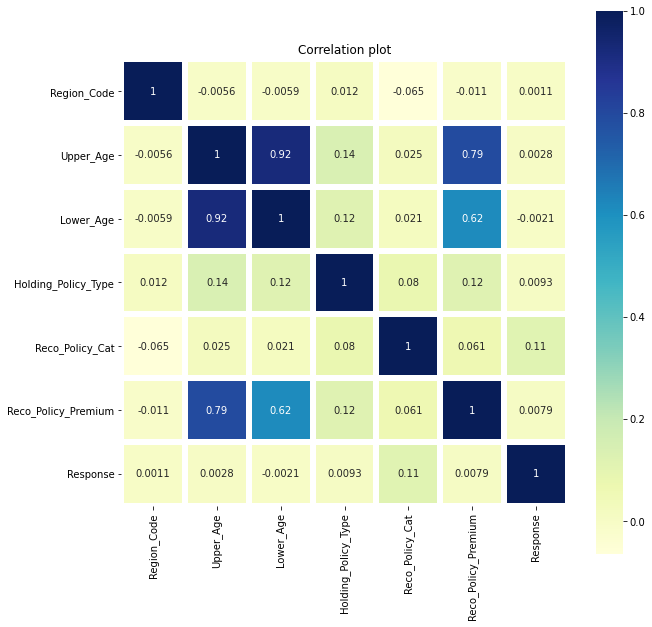

In [19]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(train.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [20]:
#List of all numerical columns
num_col = ['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type','Reco_Policy_Cat', 'Reco_Policy_Premium']

In [21]:
#Categorical columns
cat_col = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']

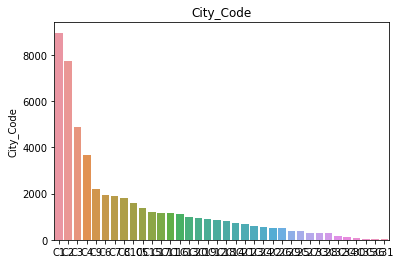

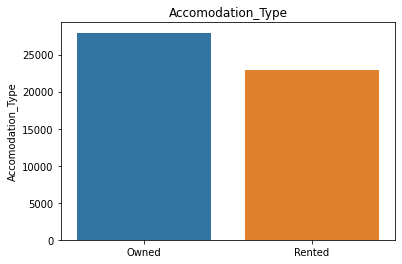

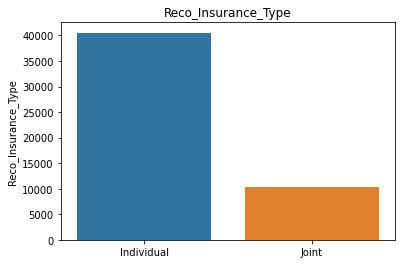

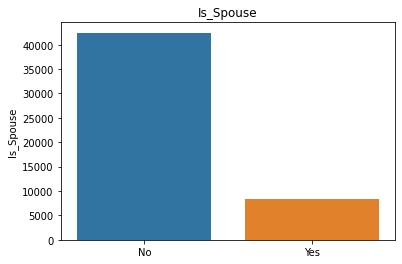

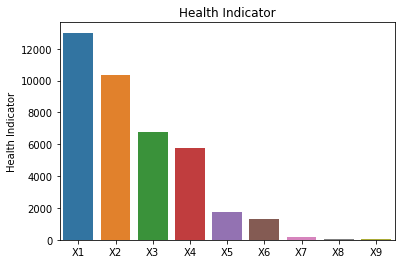

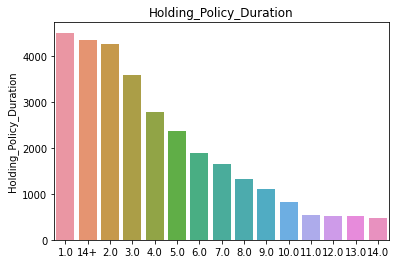

In [22]:
for cname in cat_col:
    valueCounts = train[cname].value_counts()
    sns.barplot(valueCounts.index, valueCounts).set_title(cname)
    plt.show()